In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Diagrama de sectores de falleccidos y supervivientes
import seaborn as sns
titanic = sns.load_dataset("titanic")

%matplotlib inline

# Ejercicio 

Escribir un programa que pregunte al usuario por las ventas de un rango de años y muestre por pantalla un diagrama de líneas con la evolución de las ventas.

Durante el año 2000 se vendieron 123.0 unidades
Durante el año 2001 se vendieron 456.0 unidades
Durante el año 2002 se vendieron 789.0 unidades
Durante el año 2003 se vendieron 123.0 unidades


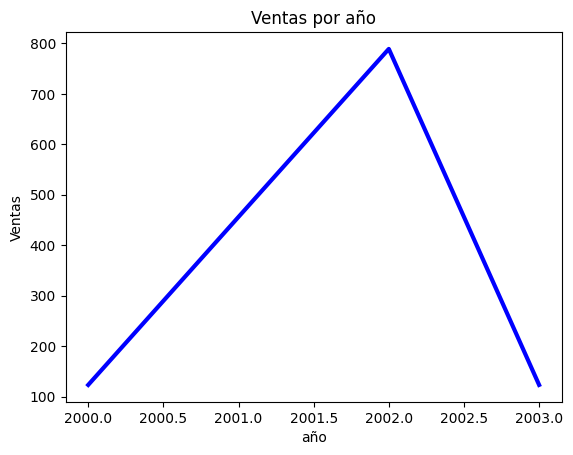

In [17]:


#Rango de años
inicio_años = int(input("Intoduzca año de inicio"))
fin_años = int(input("Introduzca año final"))

#valores de ventas
años = list(range(inicio_años,fin_años+1))
ventas = []

for i in años :
    ventas.append(float(input(f"introduzca ventas del año {i} : ")))

for i in (range(len(años))):
    print("Durante el año " + str(años[i]) +" se vendieron " + str(ventas[i])+ " unidades")


plt.plot(años,ventas,color = 'blue', linewidth = '3')
plt.title("Ventas por año")
plt.ylabel("Ventas")
plt.xlabel("año")
plt.show()





23.5

# Ejercicio 

Escribir una función que reciba una diccionario con las notas de las asignaturas de un curso y una cadena con el nombre de un color y devuelva un diagrama de barras de las notas en el color dado.

In [25]:


def plot_notas (notas, color):
    plt.bar(notas.keys(),notas.values(), color = color)
    plt.show()

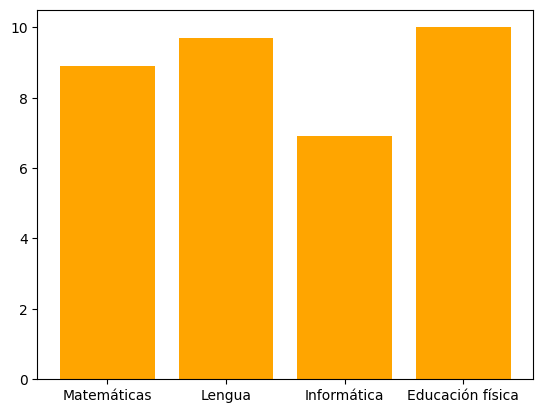

In [26]:
notas = {'Matemáticas': 8.9,
         'Lengua': 9.7,
         'Informática': 6.9,
         'Educación física': 10}
color = "orange"
plot_notas(notas,color)

# Ejercicio 

Escribir una función que reciba una serie de Pandas con las notas de los alumnos de un curso y devuelva un diagrama de cajas con las notas. El diagrama debe tener el título "Distribución de notas".

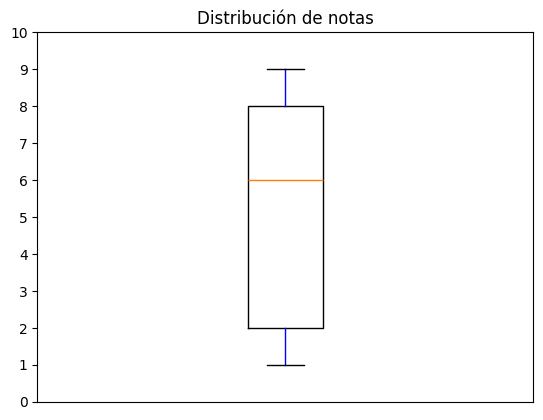

In [36]:
def distribucion_notas (notas):
    plt.boxplot(notas,whiskerprops={'color':'blue'})
    plt.xticks([])
    plt.yticks(range(0,11))
    plt.title("Distribución de notas")    


notas = pd.Series([1,2,6,8,9])

distribucion_notas(notas)

# Ejercicio 

Escribir una función que reciba una serie de Pandas con el número de ventas de un producto durante los meses de un trimestre y un título y cree un diagrama de sectores con las ventas en formato png con el titulo dado. El diagrama debe guardarse en un fichero con formato png y el título dado.

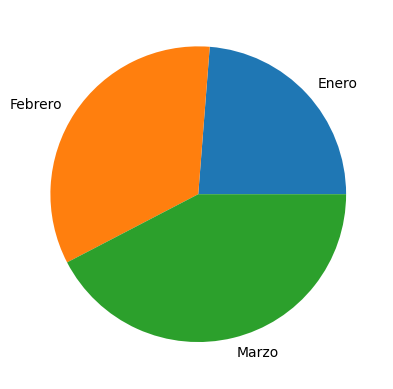

In [40]:
# Definir los meses del trimestre
meses_trimestre = ['Enero', 'Febrero', 'Marzo']

# Generar valores aleatorios para las ventas
ventas = pd.Series(np.random.randint(100, 1000, size=len(meses_trimestre)), index=meses_trimestre)

ventas

def pie_chart(serie,titulo):
    plt.pie(serie,labels= serie.index)
    plt.savefig(titulo+".png")
    plt.show()
pie_chart(ventas,"Ventas por trimestre")
 

# Ejercicio 

Escribir una función que reciba una serie de Pandas con el número de ventas de un producto por años y una cadena con el tipo de gráfico a generar (lineas, barras, sectores, areas) y devuelva un diagrama del tipo indicado con la evolución de las ventas por años y con el título "Evolución del número de ventas".

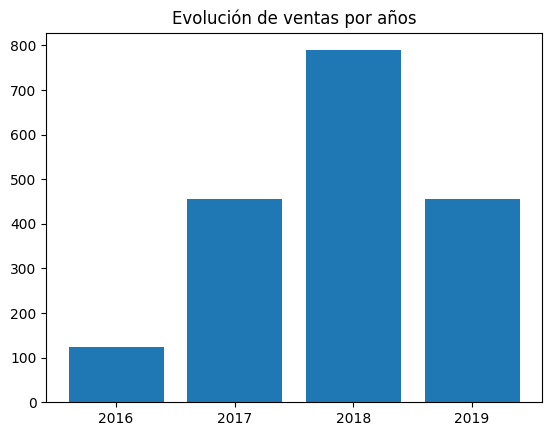

In [47]:
def ventas_año(ventas, grafico,xticks):
    if(grafico == "lineas"):
        plt.plot(ventas.index, ventas)
    elif(grafico=="area"):
        plt.fill_between(ventas.index, ventas)
    elif(grafico == 'barras'):
        plt.bar(ventas.index, ventas)
    elif(grafico == 'sectores'):
        plt.pie(ventas, labels = ventas.index)

    plt.title("Evolución de ventas por años")
    plt.xticks(xticks)

ventas = pd.Series([123,456,789,456], index=[2016,2017,2018,2019])

ventas_año(ventas,'barras',ventas.index)



23.5

# Ejercicio 

Escribir una función que reciba un dataframe de Pandas con los ingresos y gastos de una empresa por meses y devuelva un diagrama de líneas con dos líneas, una para los ingresos y otra para los gastos. El diagrama debe tener una leyenda identificando la línea de los ingresos y la de los gastos, un título con el nombre "Evolución de ingresos y gastos" y el eje y debe empezar en 0.

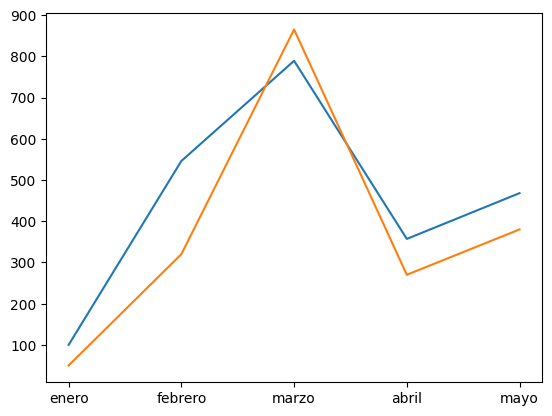

In [49]:
def f(data):
    columns = data.columns
    plt.plot(data.index,data.ingresos)
    plt.plot(data.index,data.gastos)
    

data = pd.DataFrame({'ingresos':[100,546,789,357,468],'gastos':[50,320,865,270,380]},index=['enero','febrero','marzo','abril','mayo'])

f(data)

# Ejercicio 

El dataset `titanic` contiene información sobre los pasajeros del Titanic. Crear un dataframe con Pandas y a partir de él generar los siguientes diagramas.

1. Diagrama de sectores con los fallecidos y supervivientes.
2. Histograma con las edades.
3. Diagrama de barras con el número de personas en cada clase.
3. Diagrama de barras con el número de personas fallecidas y supervivientes en cada clase.
4. Diagrama de barras con el número de personas fallecidas y supervivientes acumuladas en cada clase.

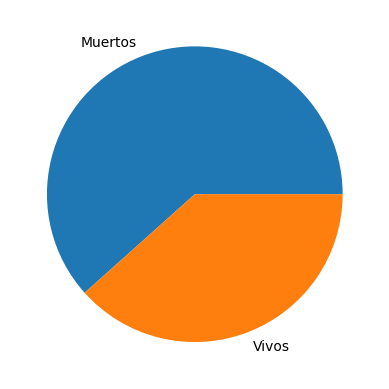

In [61]:
#Ejercicio 1
supervivientes = titanic.survived.value_counts()
dic_superv = {0:"Muertos",1:"Vivos"}
etiquetas =[dic_superv[i] for i in supervivientes.index]
plt.pie(supervivientes, labels=etiquetas)
plt.show()

<Axes: ylabel='Frequency'>

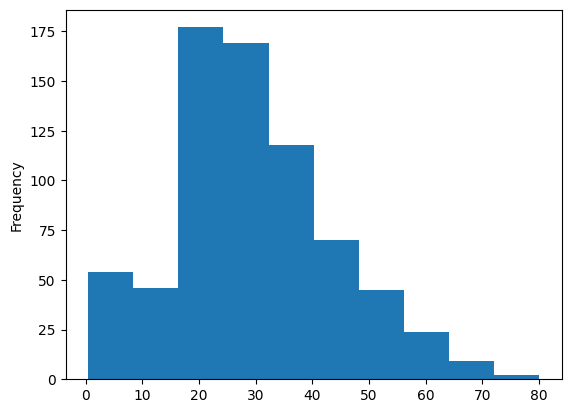

In [66]:
titanic.age.plot.hist()

In [ ]:
# Histograma de edades


<Axes: xlabel='pclass'>

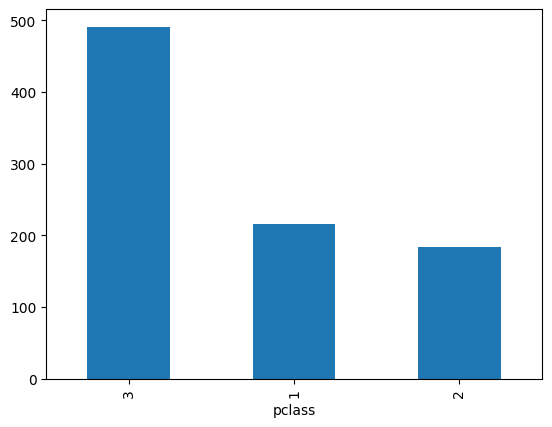

In [70]:
# Diagrama de barras con el número de personas de cada clase
titanic['pclass'].value_counts().plot.bar()

In [92]:
# Diagrama de barras con el número de personas fallecidas y supervivientes de cada clase
titanic.groupby(by=["pclass"])[titanic.survied==0,titanic.survived==1].count().plot.bar()

AttributeError: 'DataFrame' object has no attribute 'survied'

<Axes: xlabel='pclass', ylabel='count'>

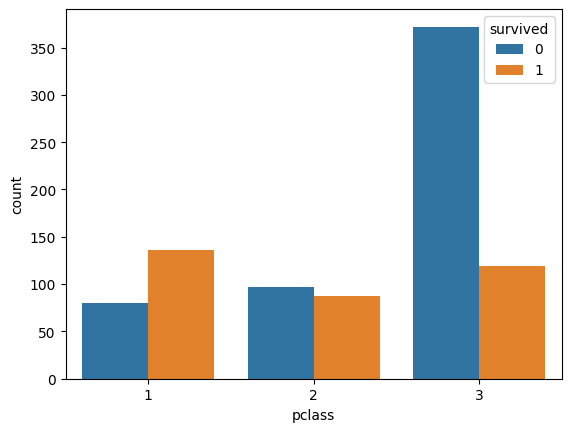

In [104]:
# Diagrama de barras con el número de personas fallecidas y supervivientes acumuladas de cada clase
vivos=titanic[titanic.survived ==1]['pclass']
muertos= titanic[titanic.survived ==0]['pclass']

#plt.bar(vivos.value_counts().index,vivos.value_counts())
#plt.bar(muertos.value_counts().index,muertos.value_counts())

sns.countplot(x='pclass', data=titanic,hue='survived',)


<Axes: xlabel='pclass'>

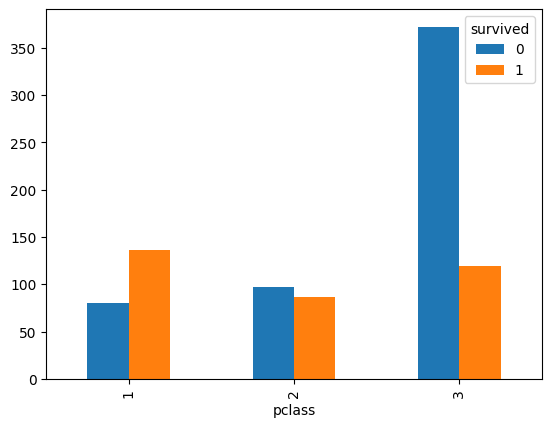

In [106]:
titanic.groupby(by=["pclass","survived"]).size().unstack().plot.bar(stacked)

In [108]:
50*8*22

8800